# Introduction to the Natural Language Toolkit (NLTK)

## Text Analysis with NLTK

### [Centre for Data, Culture & Society](http://cdcs.ed.ac.uk)

Course Instructor: Xandra Dave Cochran

Course Dates: February 2024

****

### Python Refresher

Can you name some of Python's **data types**?

There are two data types that are particularly important to understand when doing text analysis: **string** and **list**.  

**Strings** are sequences of characters (as in letters, numbers, spaces, or punctuation marks) that are contained within single quotes (`'I am a string'`) or double quotes (`"I'm a string too!"`).

**Lists** are collections of data of any type (str, int, float, dict, list, tuple, set) that are contained within square brackets (`[ ]`).  Lists can have zero or more elements, and a single list can contain elements of different data types (for example: `['hi', 123, "bonjour !", [], {"A":1, "B":2}, (1.5, 2.8), {'a', 'b', 'c'}]`).  The elements inside lists are *ordered*, which allows us to reference them by their *index* (position - numeric, starts from 0).

In [ ]:
print("Hello world")   # print() is a FUNCTION, "Hello world" is a STRING (str)

In [ ]:
greeting = "Hello world"  # we've assigned the string to a VARIABLE

In [ ]:
# This is a comment.  Comments are for you and me, Python knows to ignore them.
# In this comment I'll explain that to show values, we can choose to use print() or 
# not, and the output will be slightly different, as you can see below.
# If you want to show multiple values below a code cell like this one, you'll need all
# of the values you want returned inside a print() function (except the last one, which
# is optional), otherwise only the value in the last line of your cell will be shown
print(greeting)
greeting

In [ ]:
greeting_list = ["hello", "bonjour", "salaam", "hola"]  # 1-dimensional list of strings
print(type(greeting_list))                              # type() is another function
print(type(greeting_list[0]))

We can use a **for** loop or a **while** loop to iterate through items in a collection, such as our `greeting_list`.

In [ ]:
i = 0
for greeting in greeting_list:
    print("Greeting at index "+str(i)+": "+greeting)  # an example of CONCATENTATION 
    i += 1                                            # a shortcut for writing i = i + 1


In [ ]:
i = -1
while i > -5:
    print(greeting_list[i])  # we can reference indeces backwards using negative numbers
    i = i - 1                # we can't write i -= 1

We can define functions in order to make our code easy to re-use and maintain:

In [ ]:
def show_greetings(gl):
    for i, greeting in enumerate(gl): # you can iterate over the indices *and* the content of a list with the enumerate() function
        print(f"Greeting at index {i}: {greeting}") # You can also insert values into strings with the f-string syntax

show_greetings(greeting_list)

In [ ]:
def exclaim(greeting):
    exclamation = greeting + '!'
    # you can use conditionals to make code run only if a condition is met:
    if greeting == 'hola':
        # Use `return` when you want a function to return a value that can be used by other code
        # (`print` displays the value, but doesn't make the it available to the code that called the function)
        return '¡' + exclamation
    else:
        return exclamation
    
for g in greeting_list:
    print(exclaim(g))

We can access subsets of a list using **slicing** with square brackets and colons, where the number before the colon is included in the slice but the number after the colon is not.  If a number is omitted before the colon, Python knows to go all the way to the starting element of the list.  If a number is omitted after the colon, Python knows to go all the way to the ending element of the list.

In [ ]:
print(greeting_list[0:1])
print(greeting_list[:1])
print(greeting_list[2:])
print(greeting_list[:])
print(greeting_list[:-3])
print(greeting_list[-3:])

Lists are not the only built-in data-structure in Python. A `set` is an *unordered* data-structure that can hold a collection of *unique* values.

In [ ]:
greetings_set = set(greeting_list)
print(greetings_set)

In [ ]:
artist_set = {'Leonardo', 'Donatello', 'Raphael', 'Michelangelo'}
print(artist_set)

In [ ]:
mere_oblivion_list = ['sans', 'teeth', 'sans', 'eyes', 'sans', 'taste', 'sans', 'everything']
mere_oblivion_set = set(mere_oblivion_list)
print(mere_oblivion_list)
print(mere_oblivion_set)

## Text Analysis with NLTK

****

**Reference:**

Steven Bird, Ewan Klein, Edward Loper (2019) *Natural Language Processing with Python - Analyzing Text with the Natural Language Toolkit.*  3rd Edition.  https://www.nltk.org/book/

***

NLTK, which stands for Natural Language Toolkit, is a popular coding library for text analysis with the programming language Python.  While Python alone has some basic capabilities for analyzing text, NLTK has much more to offer, as we will see!  This Jupyter Notebook will cover the following concepts:

* [Tokenization](#tok)
* [Frequency counts and distributions](#fre)
* [Normalization](#nor)
* [Stemming](#ste)
* [Lemmatizing](#lem)
* [Part-of-speech tagging](#pos)
* [Collocations and n-grams](#col)

These are the building blocks for more complicated text analysis tasks.  They are generally part of the first step of text analysis called **preprocessing**, which gets your text data formatted in a way that NLTK's methods and functions can easily interpret.

Before we can begin our text analysis, though, we should import the libraries we'll want to use to explore the capabilities of NLTK!

In [2]:
import nltk
#nltk.download()

In [3]:

from nltk.book import * # the `*` means import all corpora (you could also specify a specific corpus)

# As an alternative to `nltk.download()`, as shown in last Notebook's class, you can specify what
# packages from NLTK to download
from nltk.tokenize import word_tokenize, sent_tokenize
nltk.download('wordnet')
from nltk.corpus import wordnet, gutenberg
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.text import Text
from nltk.stem.porter import PorterStemmer
from nltk.probability import FreqDist
nltk.download('averaged_perceptron_tagger')
from nltk.tag import pos_tag
nltk.download('tagsets')  # part of speech tags
from nltk.draw.dispersion import dispersion_plot as displt

import matplotlib.pyplot as plt   # for drawing charts to visualize data

import re               # the Regular Expression (or RegEx) library, which is useful in combination with NLTK
import string           # another useful library for acccessing lists of all letters, all punctuation, etc.

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


[nltk_data] Downloading package wordnet to /home/dave/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /home/dave/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/dave/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package tagsets to /home/dave/nltk_data...
[nltk_data]   Package tagsets is already up-to-date!


### Demo 1

Remember that the names on the left (`text1`, `text2`, ..., `text9`) are **variables** that point to the text corpora on the right (`Moby Dick...`, `Sense and Senibility...`, ..., `The Man Who Was Thursday...`).

I wonder what happens if we try to print one of these?

In [4]:
print(text2)

<Text: Sense and Sensibility by Jane Austen 1811>


Hmm.  That doesn't show us much.  What if we try slicing?

In [5]:
print(text2[0:100])

['[', 'Sense', 'and', 'Sensibility', 'by', 'Jane', 'Austen', '1811', ']', 'CHAPTER', '1', 'The', 'family', 'of', 'Dashwood', 'had', 'long', 'been', 'settled', 'in', 'Sussex', '.', 'Their', 'estate', 'was', 'large', ',', 'and', 'their', 'residence', 'was', 'at', 'Norland', 'Park', ',', 'in', 'the', 'centre', 'of', 'their', 'property', ',', 'where', ',', 'for', 'many', 'generations', ',', 'they', 'had', 'lived', 'in', 'so', 'respectable', 'a', 'manner', 'as', 'to', 'engage', 'the', 'general', 'good', 'opinion', 'of', 'their', 'surrounding', 'acquaintance', '.', 'The', 'late', 'owner', 'of', 'this', 'estate', 'was', 'a', 'single', 'man', ',', 'who', 'lived', 'to', 'a', 'very', 'advanced', 'age', ',', 'and', 'who', 'for', 'many', 'years', 'of', 'his', 'life', ',', 'had', 'a', 'constant', 'companion']


 <a id="tok"></a>
You can see that the text has been **tokenized**, or separated into its individual words, numbers, and punctuation marks.

In [6]:
type(text2)

nltk.text.Text

### Demo 2

Let's work out the length in tokens of `text1` and `text2`, *Moby Dick* and *Sense and Sensibility*.

In [7]:
md = len(text1)
ss = len(text2)
print("Length of Moby Dick:", md)
print("Length of Sense and Sensibility:", ss)

Length of Moby Dick: 260819
Length of Sense and Sensibility: 141576


Write a function to calculate the number of *unique* tokens in a text

In [8]:
def vocab_size(text):
    return len(set(text))

print("Length of vocabulary (unique words) of Moby Dick:", vocab_size(text1))
print("Length of vocabulary (unique words) of Sense and Sensibility:", vocab_size(text2))

Length of vocabulary (unique words) of Moby Dick: 19317
Length of vocabulary (unique words) of Sense and Sensibility: 6833


In [9]:
# Define a function to measure the diversity of word choice, 
# or lexical diversity. This should be the ratio of vocabulary to length:
def lexical_diversity(text):
    return vocab_size(text)/len(text)

print("Lexical Diversity of Moby Dick:", lexical_diversity(text1))
print("Lexical Diversity of Sense and Sensibility:", lexical_diversity(text2))

Lexical Diversity of Moby Dick: 0.07406285585022564
Lexical Diversity of Sense and Sensibility: 0.04826383002768831


Slicing works for us to view **tokens** in the NLTK Text object, which is the data type of `text2`.  Let's try out some of the methods and functions specific to NLTK, though, as they are designed for working with Text objects!

### Demo 3

Let's begin with the `concordance()` method.  We pass a single **token**, as a **string** (type=str), into this method.  What token would you like to see in its different contexts within the text?

In [11]:
text2.concordance('sense')  # optional parameter: lines=20 (or any number you choose)

Displaying 25 of 32 matches:
[ Sense and Sensibility by Jane Austen 1811 
sing ;-- but in HER mind there was a sense of honor so keen , a generosity so r
romance , without having much of her sense , she did not , at thirteen , bid fa
 is not in every thing equal to your sense of his merits . I have not had so ma
ion in the world of his goodness and sense . I think him every thing that is wo
 sister so easily pleased . " Of his sense and his goodness ," continued Elinor
now no moderation , and leave him no sense of fatigue ." " Aye , aye , I see ho
he visit tended to assure him of the sense , elegance , mutual affection , and 
u call him , is a sensible man ; and sense will always have attractions for me 
a mere calmness of manner with which sense had nothing to do . Towards her husb
ns on the reasonable basis of common sense and observation ; and then they may 
e ; of a child much less ; because a sense of duty would prevent the denial whi
atter farther , but in vain ; common sense , c

By default the `concordance()` method shows 25 contexts in which the input word is used, but you can specify how many contexts you would like to see by saying something like: `text2.concordance('opinion', lines=63`)

In [12]:
text2.concordance('opinion', lines=100)  # it's okay to input a greater number of lines than there are matches

Displaying 63 of 63 matches:
anner as to engage the general good opinion of their surrounding acquaintance .
. A great deal too handsome , in my opinion , for any place THEY can ever affor
s was not recommended to their good opinion by any peculiar graces of person or
ionate brother . I have the highest opinion in the world of Edward ' s heart . 
 he is always unwilling to give his opinion on any picture ; but he has an inna
 rapturous delight , which , in her opinion , could alone be called taste . Yet
tly cordial , and if THAT were your opinion , I am sure you could never be civi
s you have ; but I have the highest opinion in the world of his goodness and se
tudied his sentiments and heard his opinion on subjects of literature and taste
 that Edward stood very high in her opinion . She believed the regard to be mut
uld be !" Elinor had given her real opinion to her sister . She could not consi
nd every body was astonished at the opinion of the others . An opportunity was 
 . It was e

In [13]:
text2.concordance("Marianne", lines=20)  # default lines listed is 25

Displaying 20 of 566 matches:
 had resolved never to be taught . Marianne ' s abilities were , in many respe
had already imbibed a good deal of Marianne ' s romance , without having much 
hing . " In a few months , my dear Marianne ." said she , " Elinor will , in a
d ' s heart . But you look grave , Marianne ; do you disapprove your sister ' 
er ' s choice ?" " Perhaps ," said Marianne , " I may consider it with some su
er ? In one circumstance only , my Marianne , may your destiny be different fr
What a pity it is , Elinor ," said Marianne , " that Edward should have no tas
eral direct him perfectly right ." Marianne was afraid of offending , and said
ard which produced it . " I hope , Marianne ," continued Elinor , " you do not
you could never be civil to him ." Marianne hardly knew what to say . She woul
ld express yourself more warmly ." Marianne was rejoiced to find her sister so
least , almost so . What say you , Marianne ?" " I shall very soon think him h
ed greater certainty o

In [14]:
text2.concordance("happiness")

Displaying 25 of 66 matches:
ree , that sanguine expectation of happiness which is happiness itself . But in
 expectation of happiness which is happiness itself . But in sorrow she must be
early in life to despair of such a happiness . Why should you be less fortunate
bourhood . It was necessary to the happiness of both ; for however dissimilar i
dent mind . This was the season of happiness to Marianne . Her heart was devote
d on her present home . Elinor ' s happiness was not so great . Her heart was n
tion it was agreed , that although happiness could only be enjoyed at Whitwell 
the only form of building in which happiness is attainable , and were I rich en
g but a kind of prescience of what happiness I should experience from it , can 
declared at once his affection and happiness . " Shall we see you tomorrow to d
ile on HIM , and in her sister ' s happiness forgot for a time her own disappoi
have wealth or grandeur to do with happiness ?" " Grandeur has but little ," sa
d Marianne 

`.similar(X)` will output words that appear in the text surrounded by similar words to `X`.  This means that the output is likely to include words that are the same part of speech as `X` and words that are synonyms of `X`.  For example, the words that occur in similar contexts to the noun `"happiness"` are also nouns:

In [15]:
text2.similar("happiness")

heart mind time behaviour kindness it attachment attention mother
feelings fancy spirits joy and sister own interest son disappointment
pleasure


Let's have a look at the concordances for 'kindness' and 'happiness'.

In [16]:
text2.concordance("kindness", lines=30)

Displaying 30 of 42 matches:
 ; and by her husband with as much kindness as he could feel towards anybody b
ent by such acts of assistance and kindness to them as you have described . Wh
iddleton her acknowledgment of his kindness , and her acceptance of his propos
 they could not give offence . His kindness was not confined to words ; for wi
past , as unfortunate . In showing kindness to his cousins therefore he had th
y , and vulgar , the gratitude and kindness of Mrs . Dashwood would have been 
with more than politeness ; with a kindness which Sir John ' s account of him 
 , to which every day gave greater kindness , made such an excuse unnecessary 
 the first had regarded her with a kindness which ensured her a large share of
tempt her mother to such imprudent kindness by mentioning the offer , and to t
u will always consider me with the kindness which has made everything belongin
 himself , and did not return your kindness with any cordiality . But all this
don , he must go . He v

Pretty similar, huh? In text as in life, those two seem to be found in the same places...

`.common_contexts(L, N)` will output words that appear immediately to the left and right of all input words in list `L`.  For example, `"such"` and `"of"` are found surrounding both `"kindness"` and `"happiness"` in text2, so they are included in the output of `.common_contexts(["kindness", "happiness"])`:

In [17]:
text2.common_contexts(["kindness", "happiness"], num=5)

the_which the_of of_to his_and such_as


In [18]:
text2.common_contexts(["kindness", "happiness"], num=1)

the_which


If no result is found, NLTK will output a message that tells you this:

In [19]:
text4.common_contexts(["monstrous", "very"])

('The following word(s) were not found:', 'monstrous very')


In [20]:
text2.common_contexts(["kindness", "happiness"])  # defaults to 20 maximum

the_which the_of of_to his_and such_as her_as her_and


Let's see what type the output is

In [21]:
kind_and_happy = text2.common_contexts(["kindness", "happiness"])  # defaults to 20 maximum
type(kind_and_happy)

the_which the_of of_to his_and such_as her_as her_and


NoneType

That's a tad disquieting. It seems to reflect a rather bleak view of humankind.

Of course, NLTK isn't really having existential angst, it's just that `Text.common_contexts` is not a function that `returns` a value, it just `prints` it: and if all you want to do with the output is look at it, I suppose that's fine: but if you want to save it to a variable or pass it to other code, you need it to `return`` the results, not `print` them. This can be done with `Text._word_context_index.common_contexts`:

In [22]:
kind_and_happy = text2._word_context_index.common_contexts(["kindness", "happiness"])  # defaults to 20 maximum
print(type(kind_and_happy))
print(kind_and_happy)
kind_and_happy

<class 'nltk.probability.FreqDist'>
<FreqDist with 7 samples and 14 outcomes>


FreqDist({('the', 'which'): 2, ('the', 'of'): 2, ('of', 'to'): 2, ('his', 'and'): 2, ('such', 'as'): 2, ('her', 'as'): 2, ('her', 'and'): 2})

Much more useful!

### Demo 4

To see the frequency of a list of words (of any length) as they occur from the beginning through the end of the text, you can use a Lexical Dispersion Plot:

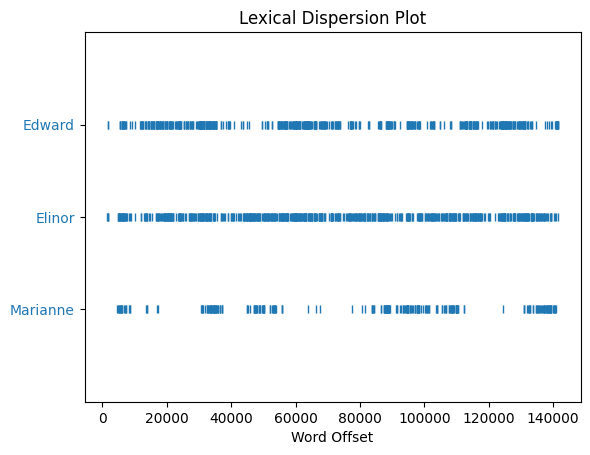

In [23]:
# Character names (note that they can't be multiple words, or there won't be a match)
text2.dispersion_plot(["Marianne", "Elinor", "Edward"])

How does this plot reflect the text?

Marianne and Elinor are the main characters of the book 'Sense and Sensibility,' so it makes sense that we'd see them consistently throughout the text!  Edward is a supporting character, so we see that his name occurs less frequently.

*waaaaaiiitasec* ... OK, this doesn't look right. Hang on.

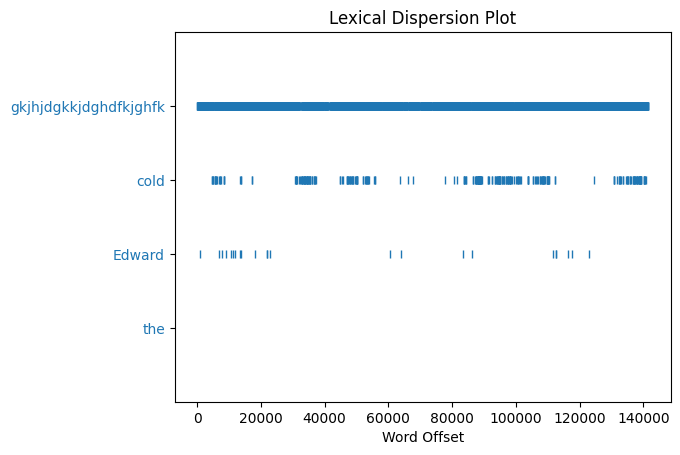

In [24]:
text2.dispersion_plot(["the", "Edward", "cold", "gkjhjdgkkjdghdfkjghfk"])

*Checks StackOverflow*

Yeah, NLTK has a bug in it. I've raised the issue with the authors, but in the meantime, here is a function that should make it behave correctly:

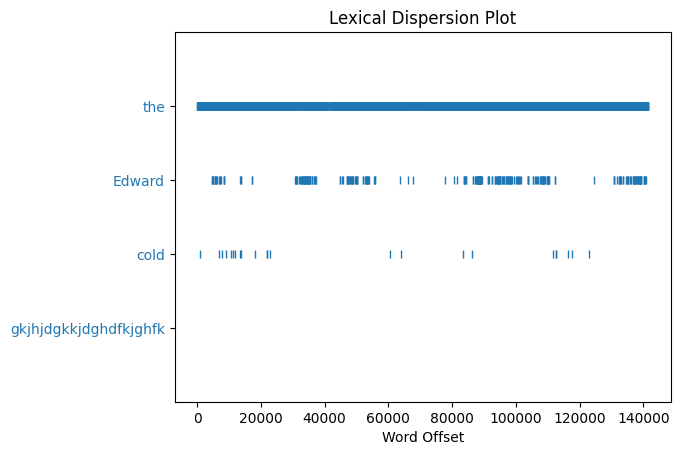

In [25]:
from nltk.draw.dispersion import dispersion_plot

def dispersion_plot_fixed(text, tokens):
    # this doesn't work with text.dispersion_ploy, which 
    # displays the plot but doesn't return it: so instead 
    # I used `nltk.draw.dispersion.dispersion_plot`
    ax = dispersion_plot(text, tokens) 
    ax.set_yticks(list(range(len(tokens))), reversed(tokens), color="C0")

dispersion_plot_fixed(text2, ["the", "Edward", "cold", "gkjhjdgkkjdghdfkjghfk"])


OK, let's try it again:

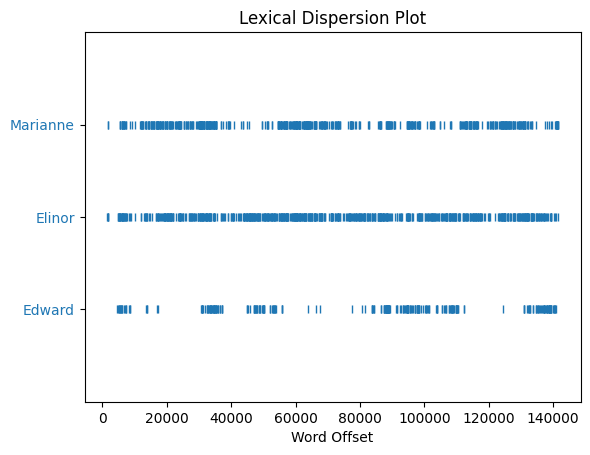

In [26]:
dispersion_plot_fixed(text2, ["Marianne", "Elinor", "Edward"])

That's better!

Have a go yourself: find some words that show an interesting distribution - such that they tend to appear in different parts of the text:

In [ ]:
# your code here

### Demo 5

When we talk about the *context* of words (or tokens!) in text analysis, we're referring to the surrounding words of a given word.  Concordances show a bit of context to the left of an input word (just before the word appears) and to the right of that word (just after that word appeared). 

The words "good" and "opinion" seem to occur together quite a bit!  To see the other words appear near that pair, we can use the `common_contexts()` method.  We pass a **list** of tokens (each token as a string) into the method.

In [28]:
text2.common_contexts(["good", "opinion"])
text2.concordance('good')

the_of
Displaying 25 of 177 matches:
le a manner as to engage the general good opinion of their surrounding acquain
 Margaret , the other sister , was a good - humored , well - disposed girl ; b
l ; but as she had already imbibed a good deal of Marianne ' s romance , witho
I mean .-- My sisters would feel the good effects of it as well as herself . A
Ferrars was not recommended to their good opinion by any peculiar graces of pe
ionate heart . His understanding was good , and his education had given it sol
He and I have been at times thrown a good deal together , while you have been 
n of his eyes , which are uncommonly good , and the general sweetness of his c
not been built many years and was in good repair . In comparison of Norland , 
ing the place under the advantage of good weather , they received an impressio
ion . The situation of the house was good . High hills rose immediately behind
deficient . Sir John Middleton was a good looking man about forty . He had for
him . His count

It seems that "the good opinion of" is the complete phrase in which the pair of words, "good" and "opinion", appear together in this text.  They don't occur together in other contexts!  But what about individually?

We can use the **similar** method to see words that appear in similar contexts, meaning they're surrounded by similar tokens, as the token we input.  Note that we pass in a single token as a string to this method.

In [29]:
print("Words with a similar context as 'good':")
text2.similar("good")

Words with a similar context as 'good':
large short long young great much comfortable kind quiet pretty
charming in respectable as to house one that time thing


In [30]:
print("Words with a similar context as 'opinion':")
text2.similar("opinion")

Words with a similar context as 'opinion':
mind wishes sister side mother affection husband behaviour time
brother knowledge wish eyes journey and family life house attention
heart


Pairs of words that occur together, such as "good" and "opinion," are referred to as **bigrams**, where "bi" indicates two.  **N-grams** are groups of words that occur together, where n is a number of your choice.

To get all the bigrams in a text, we can use the `bigrams()` method, into which we pass the variable referring to the text itself.

In [31]:
bigrams_list = list(nltk.bigrams(text2))
print(bigrams_list[:100])  # prints the first 100 bigrams

[('[', 'Sense'), ('Sense', 'and'), ('and', 'Sensibility'), ('Sensibility', 'by'), ('by', 'Jane'), ('Jane', 'Austen'), ('Austen', '1811'), ('1811', ']'), (']', 'CHAPTER'), ('CHAPTER', '1'), ('1', 'The'), ('The', 'family'), ('family', 'of'), ('of', 'Dashwood'), ('Dashwood', 'had'), ('had', 'long'), ('long', 'been'), ('been', 'settled'), ('settled', 'in'), ('in', 'Sussex'), ('Sussex', '.'), ('.', 'Their'), ('Their', 'estate'), ('estate', 'was'), ('was', 'large'), ('large', ','), (',', 'and'), ('and', 'their'), ('their', 'residence'), ('residence', 'was'), ('was', 'at'), ('at', 'Norland'), ('Norland', 'Park'), ('Park', ','), (',', 'in'), ('in', 'the'), ('the', 'centre'), ('centre', 'of'), ('of', 'their'), ('their', 'property'), ('property', ','), (',', 'where'), ('where', ','), (',', 'for'), ('for', 'many'), ('many', 'generations'), ('generations', ','), (',', 'they'), ('they', 'had'), ('had', 'lived'), ('lived', 'in'), ('in', 'so'), ('so', 'respectable'), ('respectable', 'a'), ('a', 'mann

Last class we looked quickly at a **dispersion plot**, which is a chart that visualizes when particular tokens appear within a text.  Let's try making another one of those.  We pass in a list of individual tokens, where each token is a string, to make a dispersion plot.

Let's try another text.  NLTK includes some books that were digitized for [Project Gutenberg](https://www.gutenberg.org).


In [32]:
print(nltk.corpus.gutenberg.fileids())

['austen-emma.txt', 'austen-persuasion.txt', 'austen-sense.txt', 'bible-kjv.txt', 'blake-poems.txt', 'bryant-stories.txt', 'burgess-busterbrown.txt', 'carroll-alice.txt', 'chesterton-ball.txt', 'chesterton-brown.txt', 'chesterton-thursday.txt', 'edgeworth-parents.txt', 'melville-moby_dick.txt', 'milton-paradise.txt', 'shakespeare-caesar.txt', 'shakespeare-hamlet.txt', 'shakespeare-macbeth.txt', 'whitman-leaves.txt']


### Demo 6

Let's look at one of those books, Alice's Adventures in Wonderland (with the fileid `carroll-alice.txt`), to practice tokenizing on our own.

In [33]:
alice = nltk.corpus.gutenberg.raw("carroll-alice.txt")
print(type(alice))

<class 'str'>


In [34]:
alice[:100]

"[Alice's Adventures in Wonderland by Lewis Carroll 1865]\n\nCHAPTER I. Down the Rabbit-Hole\n\nAlice was"

We can tokenize the string of Alice's Adventures in Wonderland to split it into individual words and punctuation using the function `word_tokenize()`.  We can split the string into individual sentences using the function `sent_tokenize()`.  Both tokenization functions output a list of strings.

In [35]:
alice_tokens = word_tokenize(alice)
print("Total tokens:", len(alice_tokens))
print("Sample:", alice_tokens[0:100])
print(type(alice_tokens))
print(type(alice_tokens[42]))

Total tokens: 33494
Sample: ['[', 'Alice', "'s", 'Adventures', 'in', 'Wonderland', 'by', 'Lewis', 'Carroll', '1865', ']', 'CHAPTER', 'I', '.', 'Down', 'the', 'Rabbit-Hole', 'Alice', 'was', 'beginning', 'to', 'get', 'very', 'tired', 'of', 'sitting', 'by', 'her', 'sister', 'on', 'the', 'bank', ',', 'and', 'of', 'having', 'nothing', 'to', 'do', ':', 'once', 'or', 'twice', 'she', 'had', 'peeped', 'into', 'the', 'book', 'her', 'sister', 'was', 'reading', ',', 'but', 'it', 'had', 'no', 'pictures', 'or', 'conversations', 'in', 'it', ',', "'and", 'what', 'is', 'the', 'use', 'of', 'a', 'book', ',', "'", 'thought', 'Alice', "'without", 'pictures', 'or', 'conversation', '?', "'", 'So', 'she', 'was', 'considering', 'in', 'her', 'own', 'mind', '(', 'as', 'well', 'as', 'she', 'could', ',', 'for', 'the', 'hot']
<class 'list'>
<class 'str'>


We note that the output of the tokenizer isn't a special NLTK type: it's just a list of strings.

In [36]:
alice_sents = sent_tokenize(alice)
print("Total sentences:", len(alice_sents))
print("Sample:", alice_sents[0:5])

Total sentences: 1625
Sample: ["[Alice's Adventures in Wonderland by Lewis Carroll 1865]\n\nCHAPTER I.", "Down the Rabbit-Hole\n\nAlice was beginning to get very tired of sitting by her sister on the\nbank, and of having nothing to do: once or twice she had peeped into the\nbook her sister was reading, but it had no pictures or conversations in\nit, 'and what is the use of a book,' thought Alice 'without pictures or\nconversation?'", 'So she was considering in her own mind (as well as she could, for the\nhot day made her feel very sleepy and stupid), whether the pleasure\nof making a daisy-chain would be worth the trouble of getting up and\npicking the daisies, when suddenly a White Rabbit with pink eyes ran\nclose by her.', "There was nothing so VERY remarkable in that; nor did Alice think it so\nVERY much out of the way to hear the Rabbit say to itself, 'Oh dear!", 'Oh dear!']


What if I want to know the number of words, not tokens (so excluding punctuation marks)?

In [37]:
def get_words(tokens):
    return [word for word in alice_tokens if word.isalpha()]  # List comprehension
    # If you don't know ab out list comprehensions, stop me and ask about list comprehensions!

alice_words = get_words(alice)
print("Total words:", len(alice_words))
### Same as: ###
# alice_words = []
# for word in alice_tokens:
#     if word.isalpha():
#         alice_words += [word]  # same as alice_words = alice_words + [word]

Total words: 25465


What if we want to know the size of the vocabulary, or the number of unique words, in Alice's Adventures in Wonderland?

Remember that Python (and NLTK) consider capitalized and lowercased words to be different, so in order to count the number of unique words, we must **casefold** the text, changing all words to lowercase.  Python strings have a simple method for this: `.lower()`. Write a function which casefolds a list of words, and pass `alice_words` to it.

*Note:* Casefolding is a form of **normalization**.

In [38]:
def lower_words(words):
    return [word.lower() for word in words]

alice_lower = lower_words(alice_words)
print(alice_lower[:10])

['alice', 'adventures', 'in', 'wonderland', 'by', 'lewis', 'carroll', 'chapter', 'i', 'down']


Next, let's count all the unique words from our list of casefolded words:

*Note*: Conveniently, we already wrote a function to do this

In [40]:
alice_vocab_size = vocab_size(alice_lower)

print("Vocabulary size:", alice_vocab_size, "words")

Vocabulary size: 2470 words


### Demo 7

Other forms of **normalization** involve reducing words to their root form.  For example, the words "happy" and "happiness" have the same root and very similar meanings.  There are two ways NLTK provides to reduce words to their root form:

* **Stemming**: reduces words to a root form where the root is *not* a valid word itself

    In our example, the stem of "happy" and "happiness" would be "happ."


* **Lemmatizing**: reduces words to a root form where the root *is* a valid word itself, determined based on whether it exists in WordNet's list of valid English words

    In our example, the stem of "happy" and "happiness" would be "happy."
    
There are different approaches to stemming and lemmatization we can use in NLTK.  Let's see how they differ...

In [ ]:
porter = nltk.PorterStemmer()
porter_stemmed = [porter.stem(word) for word in alice_lower]  # only includes alphabetic tokens
print(porter_stemmed[500:550])

In [ ]:
lancaster = nltk.LancasterStemmer()
lancaster_stemmed = [lancaster.stem(word) for word in alice_lower] # only includes alphabetic tokens
print(lancaster_stemmed[500:550])

In [ ]:
wnl = nltk.WordNetLemmatizer()
lemmatized = [wnl.lemmatize(word) for word in alice_lower]  # only includes alphabetic tokens
print(lemmatized[500:550])

What differences do you spot in the output samples of stems and lemmas?

*This is why it's always useful to print out samples of the data you're working with as you're coding!*

So what can we do with words once we've stemmed or lemmatized them?  Well, we could count the unique stems and lemmas, to get a different perspective on the size of the Lewis Carroll's vocabulary in Alice's Adventures in Wonderland, just as we did with the complete words.  

We could also count the frequency at which these root forms of words appear, giving us a sense of what the most common words are in the book.  Let's try that!  We'll use NLTK's `FreqDist()` function (for calculating and visualizing frequency distributions).

In [ ]:
fdist_lemmas = FreqDist(lemmatized)
fdist_lemmas  # pairs of lemmas and their counts

Now we can ask how often a particular lemma appears using the `fdist_lemmas` variable we created:

In [ ]:
print(fdist_lemmas['wonder'])

To get an easier overview, we can use visualization.  Let's create a line chart of the top 10 lemmas:

In [ ]:
plt.figure(figsize = (20, 8))
plt.rc('font', size=12)
number_of_tokens = 10 
fdist_lemmas.plot(number_of_tokens, title='Frequency Distribution for '+str(number_of_tokens)+" Most Common Lemmas in Alice's Adventures in Wonderland")
plt.show()

Hmmm.  Some of these words don't tell us a lot.  It's pretty logical that words like "the" and "she" would be used a lot, but it doesn't tell us much about what goes on in the book.

These small words that occur frequently but don't always carry large meaning, particularly in books and longer texts, are called **stopwords**.  We can filter them out with a `stopwords()` method and try re-plotting this frequency distribution.

In [ ]:
to_exclude = stopwords.words('english')  # english since the book is in English

# What other words might we want to exclude?
to_exclude += ['alice', "said"]

In [ ]:
# make a function (hint: use a list comprehension) to filter out stop words and words shorter than 2 letters
def filter_lemmas(lemmas, stops):
    pass

lemmatized_filtered = filter_lemmas(lemmatized, to_exclude)

In [ ]:
fdist_lemmas_filtered = FreqDist(lemmatized_filtered)
print("Total words after filtering:", fdist_lemmas_filtered.N())
print("50 most common words after filtering:", fdist_lemmas_filtered.most_common(50))

In [ ]:
plt.figure(figsize = (20, 8))
plt.rc('font', size=12)
number_of_tokens = 10 
fdist_lemmas_filtered.plot(number_of_tokens, title='Frequency Distribution for '+str(number_of_tokens)+" Most Common Lemmas in Alice's Adventures in Wonderland Excluding Stop Words")
plt.show()

That's more interesting!  We could do the same thing with complete words, to get a different perspective on the most common words in the book.

Another common step to preprocessing text data is **part-of-speech (POS) tagging**.  POS tagging assigns parts of speech to words and groups of words in sentences.  After tagging parts of speech, you can perform more complex tasks such as **entity recognition**, which is the process of identifying people, places, and organizations named in a text.

In [ ]:
alice_tagged = nltk.pos_tag(alice_tokens)
print(alice_tagged[0:10])

The parts of speech the abbreviations stand for are available [here](https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html)